<center>Assignment 02<br></center>
<center><b><h2>Ensemble Learning</b></center>
The Loan Dataset of a bank is given<br>
1. Read the dataset to the python environment.<br>
2. Do necessary pre-processing steps.<br>
3. Perform different Ensemble Learning techniques in the given dataset.

In [116]:
import pandas as pd
import numpy as np

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
from sklearn.preprocessing import StandardScaler

In [120]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
data = pd.read_csv('/content/drive/MyDrive/datasets/train_loan.csv')

In [123]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Handling missing values

In [125]:
# For numerical columns, filling missing values with the mean
for label in ['LoanAmount','Loan_Amount_Term']:
  data[label].fillna(data[label].mean(), inplace=True)
  data[label].fillna(data[label].mean(), inplace=True)

In [126]:
# For categorical columns, filling missing values with the mode
for label in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
  data[label].fillna(data[label].mode()[0], inplace=True)

In [127]:
# Converting 'Dependents' to numerical
data['Dependents'] = data['Dependents'].str.rstrip('+')
data['Dependents'] = pd.to_numeric(data['Dependents'], errors='coerce')

In [128]:
# Converting 'Loan_Status' to numerical
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

In [129]:
# Converting categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True, dtype=np.int64)

# drop_first=True => By default, this is set to drop_first = False . This will cause get_dummies to create one dummy variable for every level
#                     of the input categorical variable. If you set drop_first = True , then it will drop the first category.
# dtype=np.int64 => by default dtype will be converted to uint8 so to convert to int64 dtype is mentioned

In [130]:
# dropping 'Loan_ID' from data
data.drop('Loan_ID', axis=1,inplace = True)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    int64  
 1   ApplicantIncome          614 non-null    int64  
 2   CoapplicantIncome        614 non-null    float64
 3   LoanAmount               614 non-null    float64
 4   Loan_Amount_Term         614 non-null    float64
 5   Credit_History           614 non-null    float64
 6   Loan_Status              614 non-null    int64  
 7   Gender_Male              614 non-null    int64  
 8   Married_Yes              614 non-null    int64  
 9   Education_Not Graduate   614 non-null    int64  
 10  Self_Employed_Yes        614 non-null    int64  
 11  Property_Area_Semiurban  614 non-null    int64  
 12  Property_Area_Urban      614 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 62.5 KB


In [132]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162,342.000000,0.855049,0.687296,0.817590,0.653094,0.218241,0.133550,0.379479,0.328990
std,1.009623,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.463973,0.386497,0.476373,0.413389,0.340446,0.485653,0.470229
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data visualization

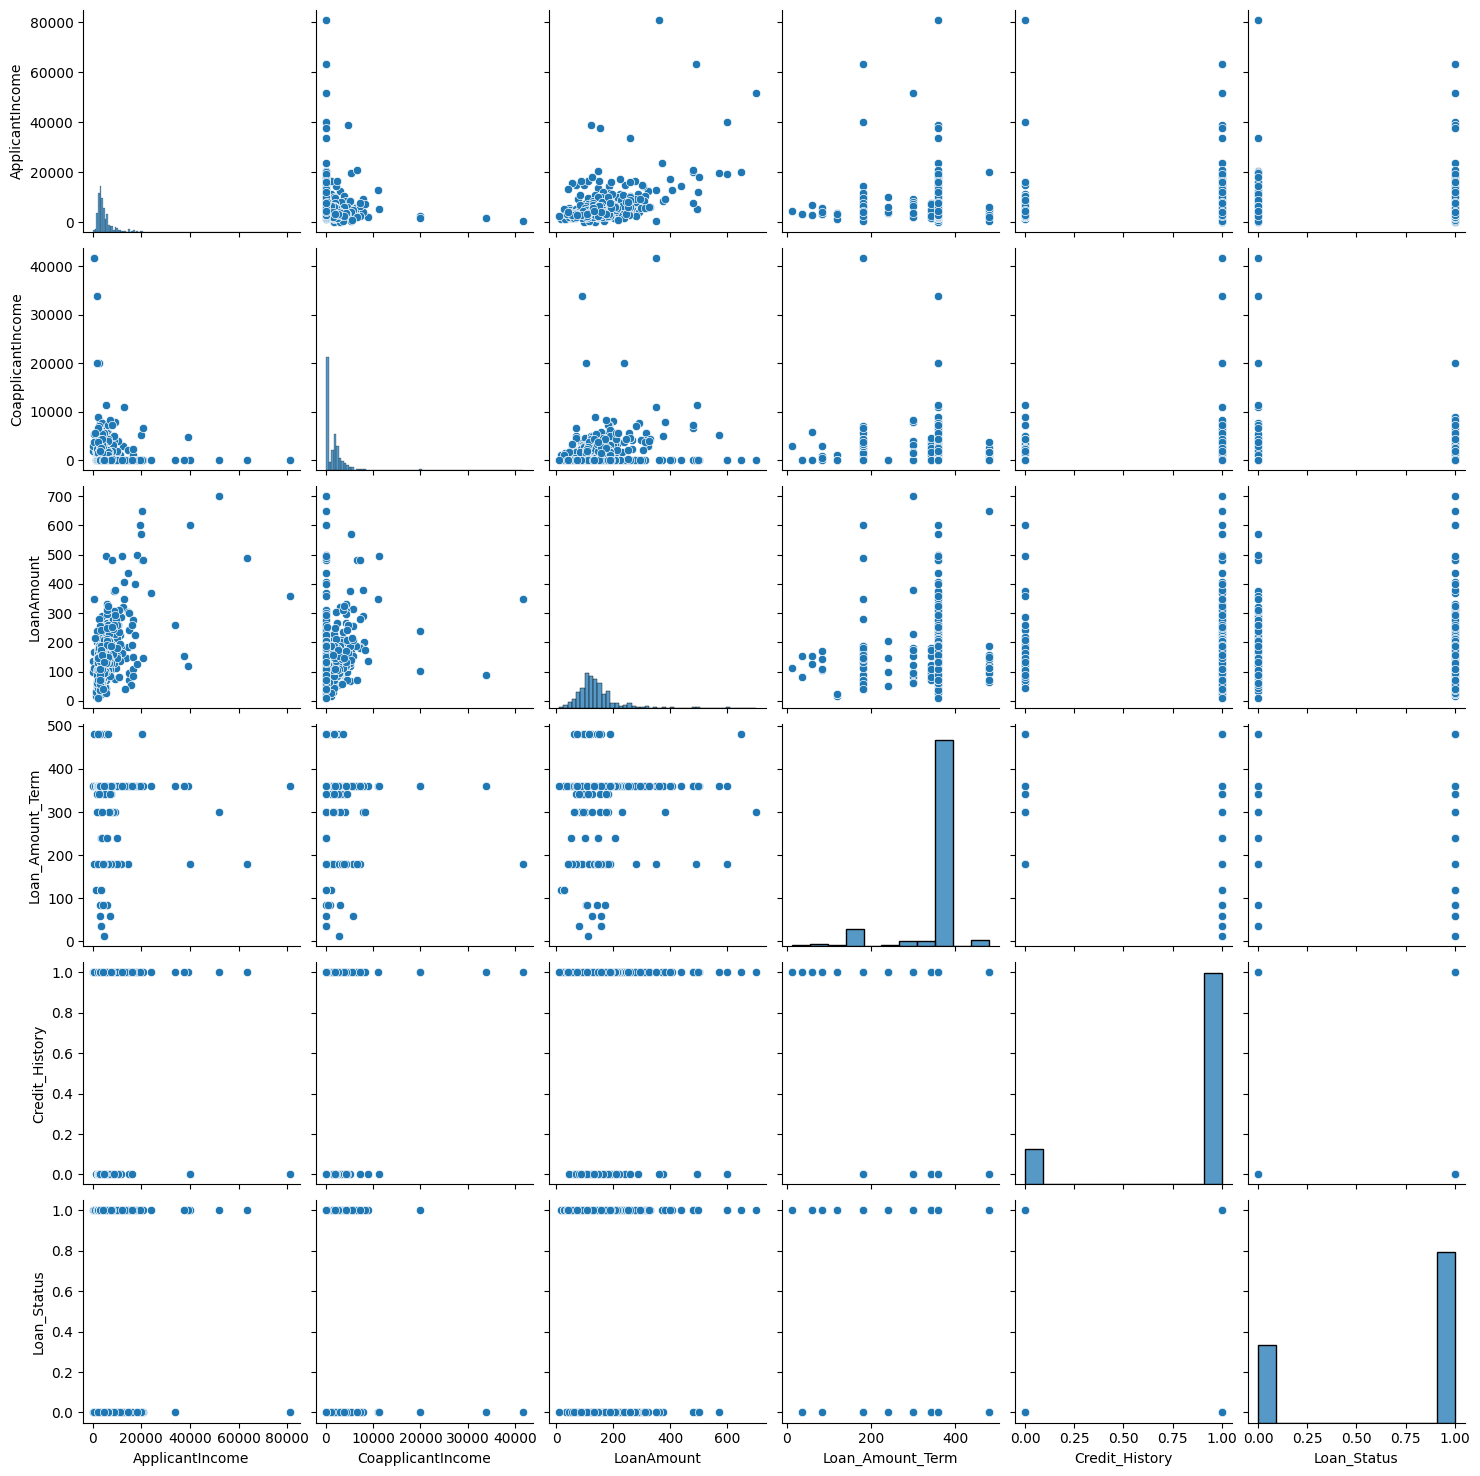

In [133]:
# Pairplot numerical features
sns.pairplot(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']])
plt.show()

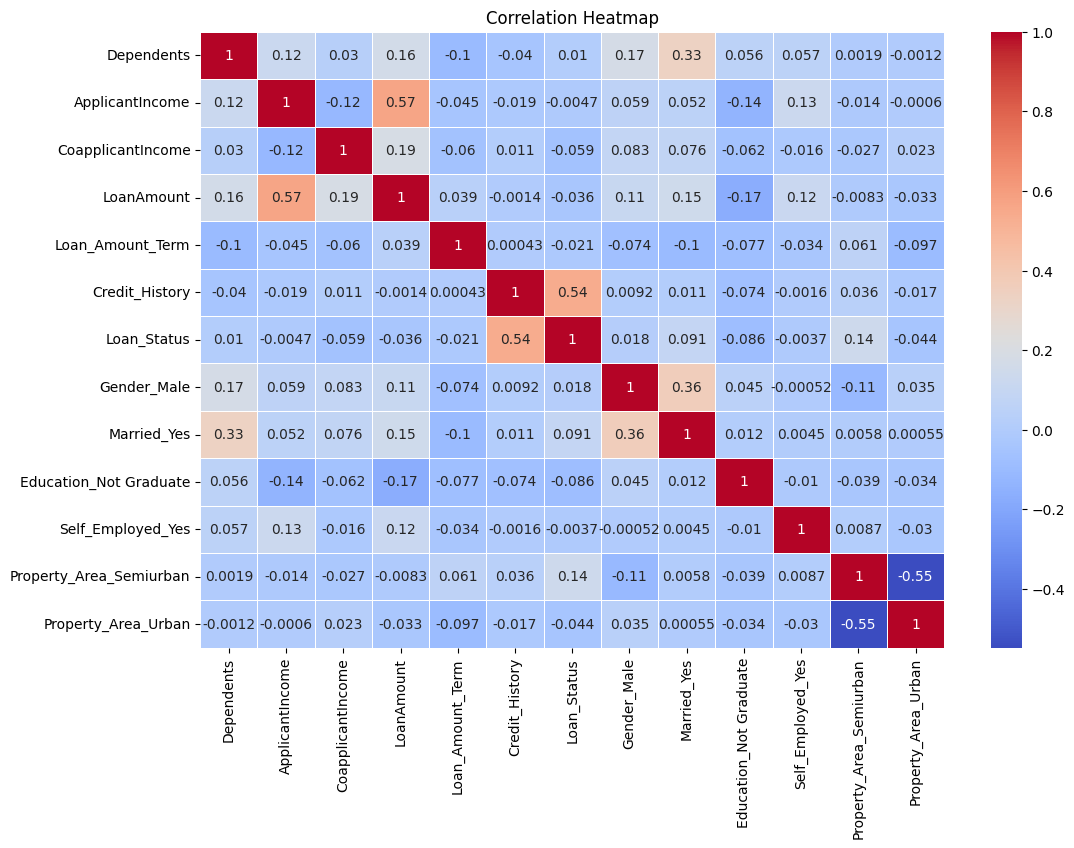

In [134]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Setting features and target variable, splitting dataset to training and testing datasets

In [135]:
# Assuming 'Loan_Status' is the target variable
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Random forest classifier

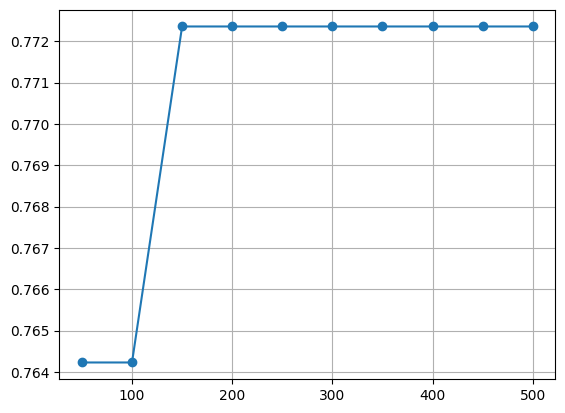

In [137]:
nest = [50 , 100, 150, 200, 250, 300, 350, 400, 450, 500]
acc_scr = []
for i in nest:
  rf_clf = RandomForestClassifier(n_estimators = i, random_state=42)
  rf_clf.fit(x_train,y_train)
  y_pred_rf = rf_clf.predict(x_test)
  acc_scr.append(accuracy_score(y_test,y_pred_rf))

plt.plot(nest,acc_scr,'o-')
plt.grid()

In [138]:
# we get max accuracy at 150, so n_estimators = 150

In [139]:
rf_model = RandomForestClassifier(n_estimators = 150, random_state = 42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy}\n\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7723577235772358


              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



### Bagging

#### Bagging with Random forest classifier

In [140]:
bag_rf_model = BaggingClassifier(base_estimator=rf_model, n_estimators = 100, random_state=42)
bag_rf_model.fit(x_train,y_train)
y_pred_rf_bag = bag_rf_model.predict(x_test)
bag_rf_accuracy = accuracy_score(y_test, y_pred_rf_bag)
print(f"Bagging Classifier with Random forest Accuracy: {bag_rf_accuracy}\n\n")
print(classification_report(y_test, y_pred_rf_bag))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier with Random forest Accuracy: 0.7886178861788617


              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### Bagging with SVM classifier

In [141]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [142]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [162]:
bag_svm_model = BaggingClassifier(base_estimator=SVC(), n_estimators = 100, random_state=42)
bag_svm_model.fit(x_train_scaled,y_train_scaled)
y_pred_svm_bag = bag_svm_model.predict(x_test_scaled)
bag_svm_accuracy = accuracy_score(y_test_scaled, y_pred_svm_bag)
print(f"\n\nBagging Classifier with SVM Accuracy: {bag_svm_accuracy}\n\n")
print(classification_report(y_test_scaled, y_pred_svm_bag))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(




Bagging Classifier with SVM Accuracy: 0.7967479674796748


              precision    recall  f1-score   support

           0       1.00      0.42      0.59        43
           1       0.76      1.00      0.86        80

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



#### Bagging with Logistic Regression

In [144]:
lr_model = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=50, random_state=42)
lr_model.fit(x_train_scaled, y_train_scaled)
y_pred_lr = lr_model.predict(x_test_scaled)
lr_accuracy = accuracy_score(y_test_scaled, y_pred_lr)
print(f"\nBagging with Logistic Regression Accuracy: {lr_accuracy}\n\n")
print(classification_report(y_test_scaled, y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



Bagging with Logistic Regression Accuracy: 0.7886178861788617


              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### Bagging with Naive Bayes

In [145]:
nb_model = BaggingClassifier(base_estimator=GaussianNB(), n_estimators=50, random_state=42)
nb_model.fit(x_train_scaled, y_train)
y_pred_nb = nb_model.predict(x_test_scaled)
nb_accuracy = accuracy_score(y_test_scaled, y_pred_nb)
print(f"\nBagging with Naive Bayes Accuracy: {nb_accuracy}")
print("\n\n",classification_report(y_test_scaled, y_pred_nb))


Bagging with Naive Bayes Accuracy: 0.7804878048780488


               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


#### Bagging with descision tree classifier

In [146]:
accuracy_baggingDt = []
dt_clf = DecisionTreeClassifier()
for i in nest:
  bg_clf = BaggingClassifier(estimator=dt_clf,n_estimators=i,random_state=42)
  bg_clf.fit(x_train,y_train)
  y_pred_bag_dt = bg_clf.predict(x_test)
  accuracy_baggingDt.append(accuracy_score(y_test,y_pred_bag_dt))

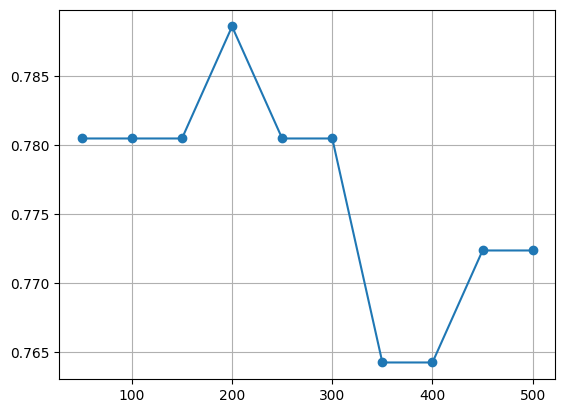

In [147]:
plt.plot(nest, accuracy_baggingDt, 'o-')
plt.grid()

In [148]:
# we get max accuracy score at 200, so n_estimators = 200

In [149]:
bag_model = BaggingClassifier(estimator=dt_clf, n_estimators = 200, random_state=42)
bag_model.fit(x_train,y_train)
y_pred_bag = bag_model.predict(x_test)
bag_accuracy = accuracy_score(y_test, y_pred_bag)
print(f"\nBagging Classifier Accuracy: {bag_accuracy}")
print("\n\n",classification_report(y_test, y_pred_bag))


Bagging Classifier Accuracy: 0.7886178861788617


               precision    recall  f1-score   support

           0       0.87      0.47      0.61        43
           1       0.77      0.96      0.86        80

    accuracy                           0.79       123
   macro avg       0.82      0.71      0.73       123
weighted avg       0.80      0.79      0.77       123



### Boosting

#### AdaBoost Classifier

In [150]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'base_estimator': [None, DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=5)]
}

In [151]:
adaboost_classifier = AdaBoostClassifier()
# Create GridSearchCV
grid_search_adaboost = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search_adaboost.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END base_estimator=None, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END base_estimator=None, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END base_estimator=None, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END base_estimator=None, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END base_estimator=None, learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV] END base_estimator=None, learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV] END base_estimator=None, learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV] END base_estimator=None, learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV] END base_estimator=None, learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV] END base_estimator=None, learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV] END base_estimator=None, learning_rate=0.01, n_estimators=150; total

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=150; total time=   0.3s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100; total time=   0.2s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=100; total time=   0.2s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=150; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=150; total time=   0.3s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=50; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=50; total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=50; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=50; total time=   0.1s

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=150; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.5, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=50; total time=   0.2s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=50; total time=   0.2s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=150; total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.01, n_estimators=150; total time=   0.4s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=50; total time=   0.2s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=50; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.1, n_estimators=150; total time=   0.4s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=50; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=50; total time=   0.1s
[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[CV] END base_estimator=DecisionTreeClassifier(max_depth=5), learning_rate=0.5, n_estimators=150; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py", line 124, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [None,
                                            DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=5)],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [152]:
best_params_adaboost = grid_search_adaboost.best_params_
print(f"Best Parameters for AdaBoost: {best_params_adaboost}")

Best Parameters for AdaBoost: {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 0.01, 'n_estimators': 50}


In [153]:
best_ada_model = AdaBoostClassifier(**best_params_adaboost)
best_ada_model.fit(x_train, y_train)
y_pred_best_ada = best_ada_model.predict(x_test)
ada_accuracy = accuracy_score(y_test, y_pred_best_ada)
print(f"AdaBoost Accuracy: {ada_accuracy}\n\n")
print(classification_report(y_test, y_pred_best_ada))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Accuracy: 0.7886178861788617


              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



####  Gradient Boosting Classifier

In [154]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [155]:
gb_classifier = GradientBoostingClassifier()
# Create GridSearchCV
grid_search_gb = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search_gb.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, n_estimators=100; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=1, n_estimators=100; total time=   0.

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [156]:
best_params_gb = grid_search_gb.best_params_
print(f"Best Parameters for Gradient Boosting: {best_params_gb}")

Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 100}


In [157]:
best_gb_model = GradientBoostingClassifier(**best_params_gb)         # (n_estimators = 100, max_depth=2, random_state=42)
best_gb_model.fit(x_train, y_train)
y_pred_best_gb = best_gb_model.predict(x_test)
best_gb_accuracy = accuracy_score(y_test, y_pred_best_gb)
print(f"Gradient Boosting Accuracy: {best_gb_accuracy}\n\n")
print(classification_report(y_test, y_pred_best_gb))

Gradient Boosting Accuracy: 0.7560975609756098


              precision    recall  f1-score   support

           0       1.00      0.30      0.46        43
           1       0.73      1.00      0.84        80

    accuracy                           0.76       123
   macro avg       0.86      0.65      0.65       123
weighted avg       0.82      0.76      0.71       123



#### XGBoost Classifier

In [158]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'gamma': [0, 1, 5]
}

In [159]:
xgb_clf = XGBClassifier()
# Create GridSearchCV
grid_search_xgb = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.3s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.2s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END gamma=0, learning_rate=0.01, max_depth=3, n_estimator

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 1, 5], 'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=2)

In [160]:
# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f"Best Parameters for XGBoost: {best_params_xgb}")

Best Parameters for XGBoost: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


In [161]:
best_xgb_model = XGBClassifier(**best_params_xgb)
best_xgb_model.fit(x_train, y_train)
y_pred_best_xgb = best_xgb_model.predict(x_test)
best_xgb_accuracy = accuracy_score(y_test, y_pred_best_xgb)
print(f"\nXGBoost Classifier Accuracy: {best_xgb_accuracy}\n\n")
print(classification_report(y_test, y_pred_best_xgb))


XGBoost Classifier Accuracy: 0.7886178861788617


              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



##### <b><i> It appears that Bagging with SVM has the highest accuracy among the models we have tested, and several other models, including Bagging with Random Forest, Bagging with Logistic Regression, AdaBoost, and XGBoost, have comparable performance.